In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train =to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
core = tf.keras.applications.densenet.DenseNet121(weights='imagenet',include_top=False,input_shape=X_train.shape[1:])
for layer in core.layers:
  layer.trainable = True

def get_model(input_shape = X_train.shape[1:]):
  input_layer = tf.keras.layers.Input(input_shape)
  x = tf.keras.applications.densenet.preprocess_input(input_layer)
  x = core(x)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(units=10, activation='softmax')(x)
  model = tf.keras.models.Model(inputs = input_layer, outputs = x)
  model.summary()
  return model

model = get_model()

29097984/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 32, 32, 3)        0         
 )                                                               
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)        0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 32, 32, 3)        0         
 da)                                                             
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam' , metrics=['mse','mae','accuracy'])

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/transfer_learning_weights.h5', monitor='val_acc', save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode = 'min'), 
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", mode = "min", patience=2)]
    
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split = 0.2, callbacks = callbacks)  

Epoch 1/20
1250/1250 [==============================] - 144s 96ms/step - loss: 1.3530 - mse: 0.0598 - mae: 0.1157 - accuracy: 0.5407 - val_loss: 1.1469 - val_mse: 0.0529 - val_mae: 0.0984 - val_accuracy: 0.6065 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - 117s 94ms/step - loss: 0.9719 - mse: 0.0448 - mae: 0.0867 - accuracy: 0.6710 - val_loss: 1.2067 - val_mse: 0.0468 - val_mae: 0.0860 - val_accuracy: 0.6626 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - 116s 93ms/step - loss: 0.7699 - mse: 0.0362 - mae: 0.0707 - accuracy: 0.7412 - val_loss: 0.8267 - val_mse: 0.0381 - val_mae: 0.0712 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - 117s 93ms/step - loss: 0.7678 - mse: 0.0362 - mae: 0.0700 - accuracy: 0.7376 - val_loss: 1.9187 - val_mse: 0.0552 - val_mae: 0.0866 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 5/20
1250/1250 [==============================] - 116s 93ms/step - loss: 0.5921 - mse: 0.0285 - ma

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy', 'lr'])

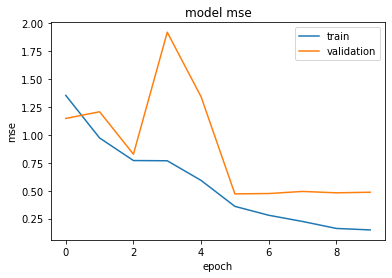

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

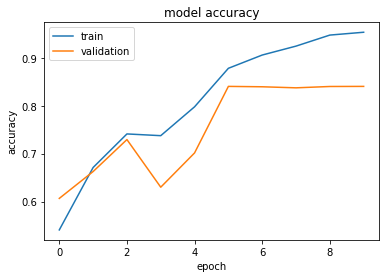

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()